# Importing

In [ ]:
import os

import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.callbacks import TensorBoard

from google.colab import files

In [ ]:
!pip install kaggle

In [ ]:
f = open('kaggle.json', 'x')
f.write('{"username":"YOUR_USERNAME","key":"YOUR_KEY"}')### need to fill 
f.close()

!mkdir -p ~/.kaggle/
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Load and prepare images 

In [ ]:
!kaggle datasets download "rashikrahmanpritom/age-recognition-dataset"
!unzip age-recognition-dataset

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/6-20/11_0_0_20170110220657089.jpg  
  inflating: Dataset/6-20/11_0_0_20170110220710576.jpg  
  inflating: Dataset/6-20/11_0_0_20170110224233654.jpg  
  inflating: Dataset/6-20/11_0_0_20170110224340941.jpg  
  inflating: Dataset/6-20/11_0_0_20170110224408700.jpg  
  inflating: Dataset/6-20/11_0_0_20170110224505551.jpg  
  inflating: Dataset/6-20/11_0_0_20170110224606036.jpg  
  inflating: Dataset/6-20/11_0_0_20170110224742037.jpg  
  inflating: Dataset/6-20/11_0_0_20170110224755272.jpg  
  inflating: Dataset/6-20/11_0_0_20170110225254975.jpg  
  inflating: Dataset/6-20/11_0_0_20170110225327724.jpg  
  inflating: Dataset/6-20/11_0_0_20170110225435539.jpg  
  inflating: Dataset/6-20/11_0_0_20170110225459361.jpg  
  inflating: Dataset/6-20/11_0_0_20170110232511893.jpg  
  inflating: Dataset/6-20/11_0_1_20170103201136230.jpg  
  inflating: Dataset/6-20/11_0_2_20170103200847287.jpg  
  inflating: Dataset/6-20/11_0_3_2017

In [ ]:

files=os.listdir('/content/Dataset')

In [ ]:
rootdir = '/content/Dataset'

images_names = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        images_names.append(os.path.join(subdir, file))

print(images_names)

['/content/Dataset/60-98/86_1_2_20170112224133563.jpg', '/content/Dataset/60-98/60_0_0_20170117135052544.jpg', '/content/Dataset/60-98/65_0_0_20170120223336620.jpg', '/content/Dataset/60-98/87_1_0_20170120224714735.jpg', '/content/Dataset/60-98/62_1_0_20170110131354284.jpg', '/content/Dataset/60-98/61_0_0_20170111222237144.jpg', '/content/Dataset/60-98/86_1_0_20170109150945088.jpg', '/content/Dataset/60-98/66_0_0_20170109013237361.jpg', '/content/Dataset/60-98/69_0_0_20170111200511915.jpg', '/content/Dataset/60-98/65_0_3_20170119205855505.jpg', '/content/Dataset/60-98/72_1_0_20170110153242401.jpg', '/content/Dataset/60-98/72_1_0_20170110180527464.jpg', '/content/Dataset/60-98/89_0_1_20170117182437361.jpg', '/content/Dataset/60-98/64_0_0_20170104185849414.jpg', '/content/Dataset/60-98/77_1_0_20170110181616162.jpg', '/content/Dataset/60-98/61_1_0_20170117175120965.jpg', '/content/Dataset/60-98/82_0_0_20170111210901892.jpg', '/content/Dataset/60-98/65_1_0_20170110143547028.jpg', '/content

In [ ]:
ages = []
for img in images_names:
  ages.append(img.split('/')[3])

print(ages)

['60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', '60-98', 

In [ ]:
images=[]

for images_name in images_names:
  image=cv2.imread(images_name)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(64,64))
  images.append(image)

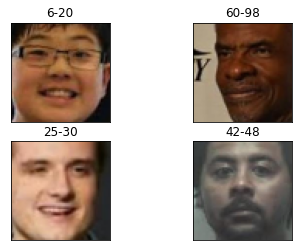

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(2,2,1),plt.imshow(images[6000])
plt.title(ages[6000]), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(images[501])
plt.title(ages[501]), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(images[4500])
plt.title(ages[4500]), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(images[7798])
plt.title(ages[7798]), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import numpy as np
images_f=np.array(images)
ages_f=np.array(ages)

In [ ]:
df = pd.DataFrame(images_names, columns=['Image_name'])
df['Label'] = ages
df

,Image_name,Label
0,/content/Dataset/60-98/86_1_2_2017011222413356...,60-98
1,/content/Dataset/60-98/60_0_0_2017011713505254...,60-98
2,/content/Dataset/60-98/65_0_0_2017012022333662...,60-98
3,/content/Dataset/60-98/87_1_0_2017012022471473...,60-98
4,/content/Dataset/60-98/62_1_0_2017011013135428...,60-98
...,...,...
9092,/content/Dataset/42-48/47_0_4_2017010421190241...,42-48
9093,/content/Dataset/42-48/45_1_4_2017011715075626...,42-48
9094,/content/Dataset/42-48/47_1_0_2017011714010007...,42-48
9095,/content/Dataset/42-48/42_0_0_2017011318542452...,42-48


In [ ]:
# create a list of our conditions
conditions = [
    (df['Label'] == '6-20'),
    (df['Label'] == '25-30'),
    (df['Label'] == '42-48'),
    (df['Label'] == '60-98')
    ]

# create a list of the values we want to assign for each condition
values = [0, 1, 2, 3]

# create a new column and use np.select to assign values to it using our lists as arguments
df['category'] = np.select(conditions, values)
df

,Image_name,Label,category
0,/content/Dataset/60-98/86_1_2_2017011222413356...,60-98,3
1,/content/Dataset/60-98/60_0_0_2017011713505254...,60-98,3
2,/content/Dataset/60-98/65_0_0_2017012022333662...,60-98,3
3,/content/Dataset/60-98/87_1_0_2017012022471473...,60-98,3
4,/content/Dataset/60-98/62_1_0_2017011013135428...,60-98,3
...,...,...,...
9092,/content/Dataset/42-48/47_0_4_2017010421190241...,42-48,2
9093,/content/Dataset/42-48/45_1_4_2017011715075626...,42-48,2
9094,/content/Dataset/42-48/47_1_0_2017011714010007...,42-48,2
9095,/content/Dataset/42-48/42_0_0_2017011318542452...,42-48,2


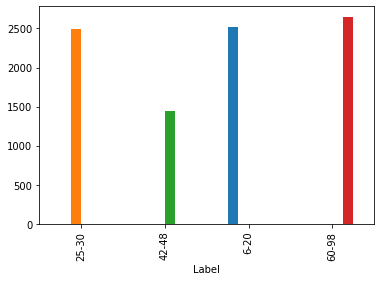

In [ ]:
ax = df.groupby('Label').category.value_counts().unstack().plot.bar()
ax.get_legend().remove()

In [ ]:
df.groupby('Label').category.value_counts()

Label  category
25-30  1           2495
42-48  2           1439
6-20   0           2514
60-98  3           2649
Name: category, dtype: int64

In [ ]:
lebels = list(df['category'])

In [ ]:
images_f_2=images_f/255

In [ ]:
labels_f=np.array(lebels)

In [ ]:
images_f_2.shape

(9097, 64, 64, 3)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.25)

# Raw Images model

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, schedules, SGD


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense= Dense(64,activation='relu')(flatten)
  drop=Dropout(0.2)(dense)
  output= Dense(4,activation="softmax",name='age_out')(drop)
  model = Model(inputs=[inputs], outputs=[output])
  model.compile(loss=["sparse_categorical_crossentropy","mae"], optimizer= "adam",
	metrics=["accuracy"])
  
  return model


In [ ]:
Model=model((64,64,3))

In [ ]:
Model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                             

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

fle_s='Age_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [ ]:
X_test.shape

(2275, 64, 64, 3)

In [ ]:
History=Model.fit(X_train,Y_train,batch_size=64,validation_data=(X_test,Y_test),epochs=60,callbacks=[callback_list])

Epoch 1/60
107/107 [==============================] - ETA: 0s - loss: 1.4476 - accuracy: 0.3596
Epoch 1: val_loss improved from inf to 1.34486, saving model to Age_detection.h5
107/107 [==============================] - 19s 45ms/step - loss: 1.4476 - accuracy: 0.3596 - val_loss: 1.3449 - val_accuracy: 0.4040
Epoch 2/60
107/107 [==============================] - ETA: 0s - loss: 1.2393 - accuracy: 0.4771
Epoch 2: val_loss improved from 1.34486 to 1.20949, saving model to Age_detection.h5
107/107 [==============================] - 4s 36ms/step - loss: 1.2393 - accuracy: 0.4771 - val_loss: 1.2095 - val_accuracy: 0.4870
Epoch 3/60
107/107 [==============================] - ETA: 0s - loss: 1.1204 - accuracy: 0.5446
Epoch 3: val_loss improved from 1.20949 to 1.10567, saving model to Age_detection.h5
107/107 [==============================] - 4s 37ms/step - loss: 1.1204 - accuracy: 0.5446 - val_loss: 1.1057 - val_accuracy: 0.5490
Epoch 4/60
107/107 [==============================] - ETA: 0s - 

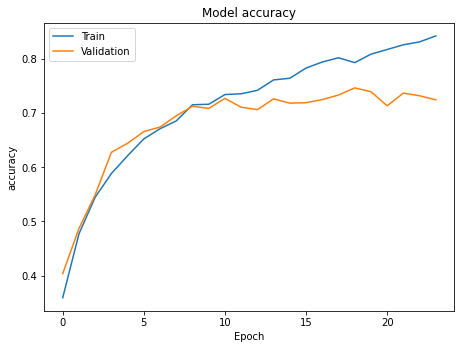

In [ ]:
import matplotlib.pyplot as plt

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

In [ ]:
def displayImage(img):
    # Show image
    plt.figure(figsize = (3,3))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

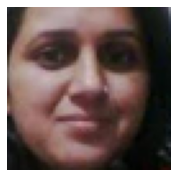

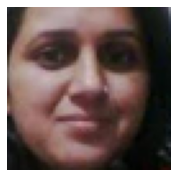

Predicted Age class: 25-30
Accuale Age class: 25-30


In [ ]:
###################
from tensorflow.keras.models import load_model

model = load_model("Age_detection.h5")
age_ranges = ['6-20', '25-30', '42-48', '60-98']


ind = 110
face_roi = cv2.resize(X_test[ind], (64, 64))
face_roi = face_roi.reshape(-1, 64, 64, 3)
face_age = age_ranges[np.argmax(model.predict(face_roi))]


displayImage(X_test[ind])
displayImage(X_test[ind])
print("Predicted Age class: "+ str(face_age))
print("Accuale Age class: "+ str(age_ranges[Y_test[ind]]))

# Image Enhancing 

In [ ]:
import cv2 as cv
from pathlib import Path
import warnings
from skimage.feature import hog
import tqdm
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [ ]:
def display_sample(images):
  print()
  plt.subplot(2,2,1),plt.imshow(images[160],cmap = 'gray')
  plt.title(Y_train[160]), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,2),plt.imshow(images[625],cmap = 'gray')
  plt.title(Y_train[625]), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,3),plt.imshow(images[4705],cmap = 'gray')
  plt.title(Y_train[4705]), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,4),plt.imshow(images[8200],cmap = 'gray')
  plt.title(Y_train[8200]), plt.xticks([]), plt.yticks([])
  plt.show()

# HOG

In [ ]:
def gray(images):
  grays = []
  for image in images:
    image = np.array(image, np.float32)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  
    grays.append(gray)
  return grays

In [ ]:
# display_sample(X_train)
# gray_images = gray(X_train)
# display_sample(gray_images)

In [ ]:
def blur(images):
  blurs = []
  for image in images:
    image = np.array(image, np.float32)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
    blur = cv.GaussianBlur(gray,(5,5),0) #Gaussian Filtering
    blurs.append(blur)
  return blurs

In [ ]:
# display_sample(X_train)
# blur_images = blur(X_train)
# display_sample(blur_images)

In [ ]:
##HOG Descriptor
#Returns an array of features

def hog_features(images):
  ppcr = 8
  ppcc = 8

  hog_features = []
  hog_images = []
  for image in tqdm.tqdm(images, desc='Applay hog on images'):
    image = np.array(image, np.float32)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  
    blur = cv.GaussianBlur(gray,(5,5),0) #Gaussian Filtering
    fd,hog_image = hog(blur, orientations=8, pixels_per_cell=(ppcr,ppcc),cells_per_block=(2,2),block_norm= "L2",visualize=True)
    hog_features.append(fd)
    hog_images.append(hog_image)
  hog_features = np.array(hog_features)
  hog_images = np.array(hog_images)
  hog_features.shape
  
  return hog_features, hog_images

In [ ]:
train_hog_features, train_hog_images = hog_features(X_train)
test_hog_features, test_hog_images = hog_features(X_test)

Applay hog on images: 100%|██████████| 2275/2275 [00:27<00:00, 81.84it/s]


In [ ]:
# display_sample(X_train)
# display_sample(train_hog_images)

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, schedules, SGD


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model2(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense= Dense(64,activation='relu')(flatten)
  drop=Dropout(0.2)(dense)
  output= Dense(4,activation="softmax",name='age_out')(drop)
  model = Model(inputs=[inputs], outputs=[output])
  model.compile(loss=["sparse_categorical_crossentropy","mae"], optimizer= "adam",
	metrics=["accuracy"])
  
  return model

In [ ]:
train_hog_images.shape

(6822, 64, 64)

In [ ]:
Model2=model2((64, 64, 1))

In [ ]:
Model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 dropout_5 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 activation_4 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                           

In [ ]:
History=Model2.fit(train_hog_images,Y_train,batch_size=64,validation_data=(test_hog_images, Y_test),epochs=30,callbacks=[callback_list])

Epoch 1/30
107/107 [==============================] - ETA: 0s - loss: 1.4199 - accuracy: 0.2763
Epoch 1: val_loss did not improve from 0.76463
107/107 [==============================] - 5s 38ms/step - loss: 1.4199 - accuracy: 0.2763 - val_loss: 1.3701 - val_accuracy: 0.2782
Epoch 2/30
107/107 [==============================] - ETA: 0s - loss: 1.3616 - accuracy: 0.2831
Epoch 2: val_loss did not improve from 0.76463
107/107 [==============================] - 4s 34ms/step - loss: 1.3616 - accuracy: 0.2831 - val_loss: 1.3674 - val_accuracy: 0.2862
Epoch 3/30
107/107 [==============================] - ETA: 0s - loss: 1.3617 - accuracy: 0.2861
Epoch 3: val_loss did not improve from 0.76463
107/107 [==============================] - 4s 37ms/step - loss: 1.3617 - accuracy: 0.2861 - val_loss: 1.3671 - val_accuracy: 0.2862
Epoch 4/30
107/107 [==============================] - ETA: 0s - loss: 1.3618 - accuracy: 0.2888
Epoch 4: val_loss did not improve from 0.76463
107/107 [=======================

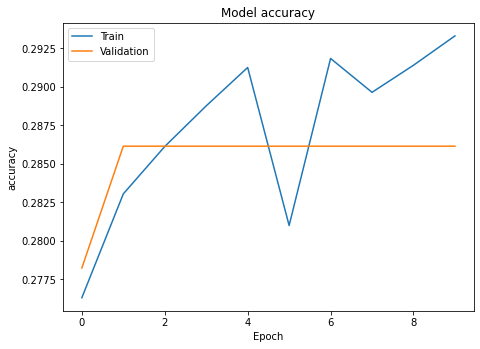

In [ ]:
import matplotlib.pyplot as plt

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

# Canny 

In [ ]:
## Canny Edge detection

def canny(images):
  edges =[]
  for image in tqdm.tqdm(images, desc='Extract Canny edges'):
    image = np.array(image*255, np.uint8)
    img_edges = cv2.Canny(image, threshold1=150, threshold2=200, apertureSize = 3)
    edges.append(img_edges)
  edges = np.array(edges)
  n_samples_edges = len(edges)
  # edge_images = edges.reshape((len(images), -1))
  # edge_images.shape
  return edges

In [ ]:
train_canny_edges = canny(X_train)
test_canny_edges = canny(X_test)

Extract Canny edges: 100%|██████████| 2275/2275 [00:00<00:00, 5868.31it/s]


In [ ]:
# display_sample(X_train)
# display_sample(train_canny_edges)

In [ ]:
train_canny_edges.shape

(6822, 64, 64)

In [ ]:
all_images_resized = []
image_hist = []
train_images = []
hog_images = []
hog_features = []
edge_images = []
edges = []
all_images = []

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, schedules, SGD

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x

def model3(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense = Dense(64,activation='relu')(flatten)
  drop = Dropout(0.2)(dense)
  output = Dense(4,activation="softmax",name='age_out')(drop)
  model = Model(inputs=[inputs], outputs=output)
  model.compile(loss=["sparse_categorical_crossentropy","mae"], optimizer= "adagrad",
	metrics=["accuracy"])
  
  return model

In [ ]:
Model3=model2((64, 64, 1))

In [ ]:
Model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 dropout_10 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 activation_8 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        18496     
                                                           

In [ ]:
History=Model3.fit(train_canny_edges,Y_train,batch_size=64,validation_data=(test_canny_edges,Y_test),epochs=30,callbacks=[callback_list])

Epoch 1/30
107/107 [==============================] - ETA: 0s - loss: 4.0450 - accuracy: 0.3695
Epoch 1: val_loss did not improve from 0.76463
107/107 [==============================] - 5s 36ms/step - loss: 4.0450 - accuracy: 0.3695 - val_loss: 1.5437 - val_accuracy: 0.4488
Epoch 2/30
107/107 [==============================] - ETA: 0s - loss: 1.5090 - accuracy: 0.4182
Epoch 2: val_loss did not improve from 0.76463
107/107 [==============================] - 4s 34ms/step - loss: 1.5090 - accuracy: 0.4182 - val_loss: 1.4960 - val_accuracy: 0.4646
Epoch 3/30
107/107 [==============================] - ETA: 0s - loss: 1.4477 - accuracy: 0.4280
Epoch 3: val_loss did not improve from 0.76463
107/107 [==============================] - 4s 34ms/step - loss: 1.4477 - accuracy: 0.4280 - val_loss: 1.4151 - val_accuracy: 0.4747
Epoch 4/30
107/107 [==============================] - ETA: 0s - loss: 1.3945 - accuracy: 0.4396
Epoch 4: val_loss did not improve from 0.76463
107/107 [=======================

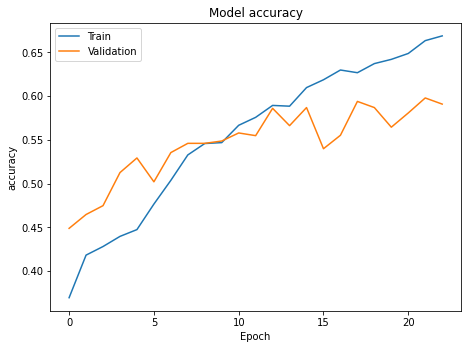

In [ ]:
import matplotlib.pyplot as plt

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

# Prediction

In [ ]:
def displayImage(img):
    # Show image
    plt.figure(figsize = (3,3))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
def test_image(ind,test_set,Model):
  displayImage(X_test[ind])
  displayImage(test_set[ind])
  image_test = test_set[ind]
  pred=Model.predict(np.array([image_test]))
  pred= np.argmax(pred[0])
  age = Y_test[ind]

  print("Predicted Age class: "+ str(age_ranges[pred]))
  print("Accuale Age class: "+ str(age_ranges[Y_test[ind]]))

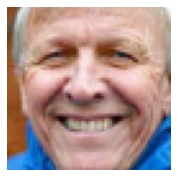

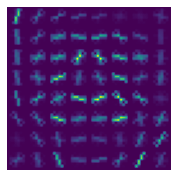

Predicted Age class: 60-98
Accuale Age class: 60-98


In [ ]:
test_image(1888,test_hog_images,Model2)

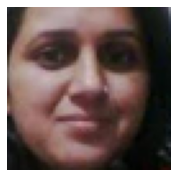

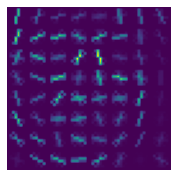

Predicted Age class: 60-98
Accuale Age class: 25-30


In [ ]:
test_image(110,test_hog_images,Model2)

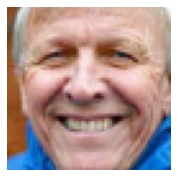

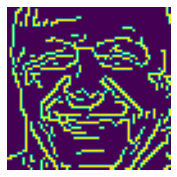

Predicted Age class: 60-98
Accuale Age class: 60-98


In [ ]:
test_image(1888,test_canny_edges,Model3)

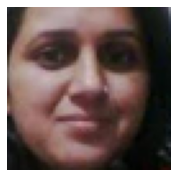

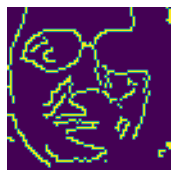

Predicted Age class: 25-30
Accuale Age class: 25-30


In [ ]:
test_image(110,test_canny_edges,Model3)

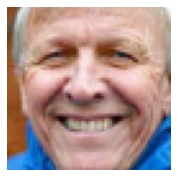

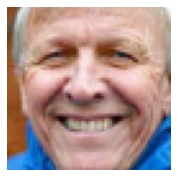

Predicted Age class: 60-98
Accuale Age class: 60-98


In [ ]:
###################
from tensorflow.keras.models import load_model

model = load_model("Age_detection.h5")
age_ranges = ['6-20', '25-30', '42-48', '60-98']

# face_roi = img_copy[y2:y2+h2, x2:x2+w2]
ind = 1888
face_roi = cv2.resize(X_test[ind], (64, 64))
face_roi = face_roi.reshape(-1, 64, 64, 3)
face_age = age_ranges[np.argmax(model.predict(face_roi))]
# print(face_age)

displayImage(X_test[ind])
displayImage(X_test[ind])
print("Predicted Age class: "+ str(face_age))
print("Accuale Age class: "+ str(age_ranges[Y_test[ind]]))